# Decision tree regressor using scikit-learn

In [139]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz 
from sklearn.metrics import mean_squared_error

# Weather data

In [71]:
col_names = ['date','avgtemp', 'mintemp', 'pp', 'snow', 'wind-dir', 'wind-speed', 'wind-gut', 'air-pressure', 'sunshine', 'dummy']
#Reads the comma separated csv into a pandas dataframe
daily_weather_df =pd.read_csv('KCQT0.csv', sep=',',names=col_names, header = None)


In [72]:
print("Weather dataframe looks like:")
daily_weather_df.head()

Weather dataframe looks like:


,date,avgtemp,mintemp,pp,snow,wind-dir,wind-speed,wind-gut,air-pressure,sunshine,dummy
0,2000-01-01,10.4,7.8,13.9,NaN,NaN,NaN,2.0,NaN,1018.9,NaN
1,2000-01-02,12.0,7.2,15.6,NaN,NaN,NaN,8.1,NaN,1021.0,NaN
2,2000-01-03,11.4,5.6,18.9,NaN,NaN,NaN,1.3,NaN,1026.5,NaN
3,2000-01-04,12.6,7.2,20.0,NaN,NaN,NaN,3.0,NaN,1024.9,NaN
4,2000-01-05,13.3,5.6,21.7,NaN,NaN,NaN,1.9,NaN,1018.0,NaN


In [73]:
#Delete irrelevant cols
del daily_weather_df['dummy']
del daily_weather_df['air-pressure']
del daily_weather_df['wind-speed']
del daily_weather_df['snow']
del daily_weather_df['wind-dir']
del daily_weather_df['date']
del daily_weather_df['mintemp']

In [74]:
print("Weather dataframe now looks like:")
daily_weather_df.head()

Weather dataframe now looks like:


,avgtemp,pp,wind-gut,sunshine
0,10.4,13.9,2.0,1018.9
1,12.0,15.6,8.1,1021.0
2,11.4,18.9,1.3,1026.5
3,12.6,20.0,3.0,1024.9
4,13.3,21.7,1.9,1018.0


In [75]:
daily_weather_df.shape

(2174, 4)

In [76]:
#Check how many NaN entries in each column
daily_weather_df.isnull().sum()

avgtemp      10
pp           10
wind-gut    224
sunshine    233
dtype: int64

In [77]:
#Delete rows with NaN entries
daily_weather_df.dropna(inplace=True)


In [78]:
daily_weather_df.shape

(1866, 4)

# Regression task

Let's predict precipitation given avg-temp, min-temp, wind-gut and sunshine. We'll do that by doing regression using Decision Trees

In [79]:
#Drop precipitation column to get weather_features
weather_features = daily_weather_df.drop(['pp'], axis=1)

In [80]:
weather_features.head()

,avgtemp,wind-gut,sunshine
0,10.4,2.0,1018.9
1,12.0,8.1,1021.0
2,11.4,1.3,1026.5
3,12.6,3.0,1024.9
4,13.3,1.9,1018.0


In [81]:
precipitation_labels = daily_weather_df['pp']

In [82]:
 precipitation_labels.head()

0    13.9
1    15.6
2    18.9
3    20.0
4    21.7
Name: pp, dtype: float64

# Training and test data split

In [83]:
#Declare random state to be an int to get reproducible output, shuffle is True by default
X_train, X_test, y_train, y_test = train_test_split(weather_features, precipitation_labels,
                                                    test_size=0.30, random_state=10, shuffle=True)

In [84]:
print(f"Training data : {X_train.shape}, {y_train.shape}")
print(f"Test data : {X_test.shape}, {y_test.shape}")

Training data : (1306, 3), (1306,)
Test data : (560, 3), (560,)


# Regression Tree

In [88]:
tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(167.4, 195.696, 'X[0] <= 17.95\nmse = 22.44\nsamples = 1306\nvalue = 22.881'),
 Text(83.7, 152.208, 'X[0] <= 14.65\nmse = 9.193\nsamples = 683\nvalue = 19.421'),
 Text(41.85, 108.72, 'X[0] <= 12.25\nmse = 5.516\nsamples = 332\nvalue = 17.362'),
 Text(20.925, 65.232, 'X[1] <= 3.55\nmse = 4.064\nsamples = 106\nvalue = 15.417'),
 Text(10.4625, 21.744, 'mse = 2.669\nsamples = 55\nvalue = 16.476'),
 Text(31.387500000000003, 21.744, 'mse = 3.052\nsamples = 51\nvalue = 14.275'),
 Text(62.775000000000006, 65.232, 'X[1] <= 3.25\nmse = 3.591\nsamples = 226\nvalue = 18.274'),
 Text(52.3125, 21.744, 'mse = 3.449\nsamples = 126\nvalue = 18.926'),
 Text(73.2375, 21.744, 'mse = 2.56\nsamples = 100\nvalue = 17.453'),
 Text(125.55000000000001, 108.72, 'X[0] <= 15.65\nmse = 4.869\nsamples = 351\nvalue = 21.368'),
 Text(104.625, 65.232, 'X[2] <= 1021.35\nmse = 2.913\nsamples = 111\nvalue = 19.968'),
 Text(94.16250000000001, 21.744, 'mse = 2.097\nsamples = 102\nvalue = 19.704'),
 Text(115.0875, 21.7

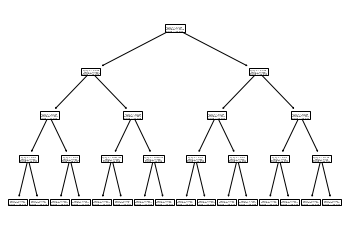

In [89]:
tree.plot_tree(tree_reg) 

# Prettier visuals

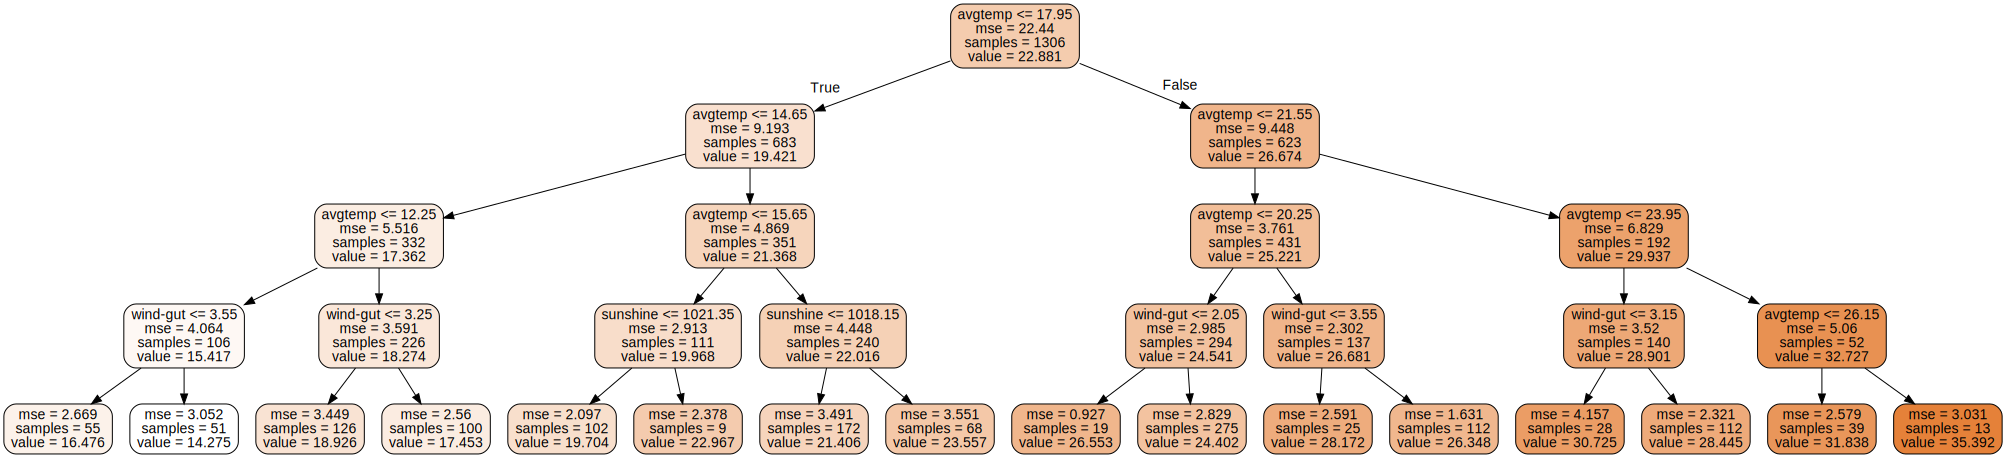

In [90]:
dot_data = export_graphviz(
            tree_reg,
            out_file=None,
            feature_names=weather_features.columns,
            rounded=True,
            filled=True
        )
    
    
prettier_graph = graphviz.Source(dot_data)  
prettier_graph


# Predictions

## Individual data point predictions

In [120]:
X_test.head()

,avgtemp,wind-gut,sunshine
646,17.3,2.9,1015.1
36,14.6,2.3,1022.2
68,12.0,4.4,1023.5
716,13.7,2.0,1018.1
843,16.2,5.1,1014.4


In [122]:
y_test.head()

646    20.6
36     23.9
68     16.7
716    17.2
843    20.6
Name: pp, dtype: float64

In [130]:
x_sample_point = X_test.loc[646]
y_sample_point = y_test.loc[646]
print(x_sample_point)

avgtemp       17.3
wind-gut       2.9
sunshine    1015.1
Name: 646, dtype: float64


In [134]:
print(f"True precipitation is : {y_sample_point}")
print(f"Prediction precipitation is  {tree_reg.predict([x_sample_point])}")

True precipitation is : 20.6
Prediction precipitation is  [21.40639535]


## Test set predictions

In [91]:
y_pred = tree_reg.predict(X_test)

In [103]:
type(y_pred), y_pred.shape

(numpy.ndarray, (560,))

In [136]:
y_pred[:10]

array([21.40639535, 18.92619048, 14.2745098 , 18.92619048, 21.40639535,
       28.44464286, 18.92619048, 30.725     , 28.44464286, 18.92619048])

# Evaluation of predictions

In [105]:
y_test_numpy = y_test.to_numpy()

In [137]:
#Root mean squared error between predictions and test values
mean_squared_error(y_test_numpy,y_pred,squared=False)

1.7764921365123483

In [138]:
#Plot of y_test and y_pred

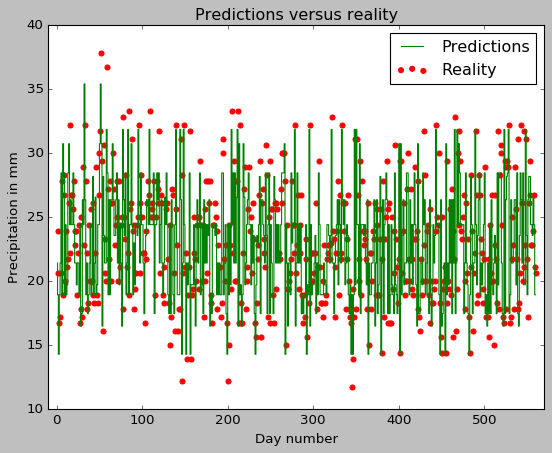

In [186]:
evaluation_of_predictions =plt.figure()
plt.scatter(range(1,561),y_test, color="red", label="Reality");
plt.step(range(1,561),y_pred, color="green",label="Predictions");
plt.xlim(-10,570)
plt.title("Predictions versus reality")
plt.xlabel("Day number")
plt.ylabel("Precipitation in mm");
plt.legend();